In [554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [555]:
df = pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [556]:
df = df.dropna(subset=['state'])
df['state'].fillna('Unknown')

0       WA
1       OR
2       KS
3       CA
4       CO
        ..
5411    MO
5412    CA
5413    KS
5414    IL
5415    AZ
Name: state, Length: 5416, dtype: object

In [557]:
grouped = df.groupby(['race', 'signs_of_mental_illness']).size().unstack(fill_value=0)

In [558]:
# Obliczenie odsetka ofiar z chorobą psychiczną dla każdej rasy
grouped['total'] = grouped.sum(axis=1)
grouped['percent_with_mental_illness'] = grouped.apply(lambda x: (x[True] / x['total']) * 100, axis=1)
print(grouped)

signs_of_mental_illness  False  True  total  percent_with_mental_illness
race                                                                    
A                           69    24     93                    25.806452
B                         1114   184   1298                    14.175655
H                          745   157    902                    17.405765
N                           64    14     78                    17.948718
O                           37    11     48                    22.916667
W                         1763   713   2476                    28.796446


In [559]:
highest_percent_race = grouped['percent_with_mental_illness'].idxmax()
highest_percent_value = grouped['percent_with_mental_illness'].max().round(2)
print(f"Rasa {highest_percent_race}, to rasa z największym odsetkiem ofiar z chorobą psychiczną, którego wartośc wynosi {highest_percent_value}%")

Rasa W, to rasa z największym odsetkiem ofiar z chorobą psychiczną, którego wartośc wynosi 28.8%


In [560]:
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
day_of_week_counts = df['day_of_week'].value_counts().sort_index()

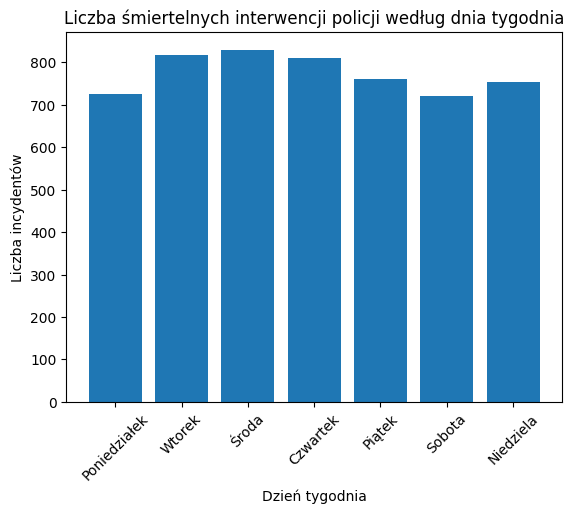

In [561]:
plt.bar(day_of_week_counts.index, day_of_week_counts.values)
plt.xticks(day_of_week_counts.index, ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela'])
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba incydentów")
plt.xticks(rotation=45)
plt.title("Liczba śmiertelnych interwencji policji według dnia tygodnia")
plt.show()

In [562]:
population_url = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"
population_tables = pd.read_html(population_url)
population_df = population_tables[0]
population_df.head()

,"Rank in states & territories, 2020","Rank in states & territories, 2010",State,"Census population, April 1, 2020 [1][2]","Census population, April 1, 2010 [1][2]","Percent change, 2010–2020 [note 1]","Absolute change, 2010-2020","Total seats in the U.S. House of Representatives, 2023–2033",Census population per electoral vote [note 2],Census population per House seat,"Percent of the total U.S. population, 2020 [note 3]"
0,1,1,California,39538223,37253956,6.1%,+2284267,52,732189,760350,11.80%
1,2,2,Texas,30145505,25145561,15.9%,+3999944,38,728638,766987,8.70%
2,3,4,Florida,21538187,18801310,14.6%,+2736877,28,717940,769221,6.43%
3,4,3,New York,20201249,19378102,4.2%,+823147,26,721473,776971,6.03%
4,5,6,Pennsylvania,13002700,12702379,2.4%,+300321,17,684353,764865,3.88%


In [563]:
state_codes_url = "https://en.wikipedia.org/wiki/List_of_U.S._state_and_territory_abbreviations"
state_codes_tables = pd.read_html(state_codes_url, header=0)
state_codes_df = state_codes_tables[1]
state_codes_df.head()

,Name,Status of region,ISO,ANSI,ANSI.1,USPS,USCG,GPO,AP,Other abbreviations
0,Name,Status of region,NaN,NaN,NaN,NaN,NaN,GPO,AP,Other abbreviations
1,United States of America,Federal state,US USA 840,US,0.0,NaN,NaN,U.S.,U.S.,U.S.A.
2,Alabama,State,US-AL,AL,1.0,AL,AL,Ala.,Ala.,NaN
3,Alaska,State,US-AK,AK,2.0,AK,AK,Alaska,Alaska,Ak.[2]
4,Arizona,State,US-AZ,AZ,4.0,AZ,AZ,Ariz.,Ariz.,NaN


In [564]:
print(population_df.columns)

Index(['Rank in states & territories, 2020',
       'Rank in states & territories, 2010', 'State',
       'Census population, April 1, 2020 [1][2]',
       'Census population, April 1, 2010 [1][2]',
       'Percent change, 2010–2020 [note 1]', 'Absolute change, 2010-2020',
       'Total seats in the U.S. House of Representatives, 2023–2033',
       'Census population per electoral vote [note 2]',
       'Census population per House seat',
       'Percent of the total U.S. population, 2020 [note 3]'],
      dtype='object')


In [565]:
print(state_codes_df.columns)

Index(['Name', 'Status of region', 'ISO', 'ANSI', 'ANSI.1', 'USPS', 'USCG',
       'GPO', 'AP', 'Other abbreviations'],
      dtype='object')


In [566]:
# Usuwanie niepotrzebnych kolumn
population_df = population_df[['State', 'Census population, April 1, 2020 [1][2]']]
state_codes_df = state_codes_df[['Name', 'ANSI']]

In [567]:
# Zmiana nazwy kolumny
population_df = population_df.rename(columns={'Census population, April 1, 2020 [1][2]': 'Population'})
state_codes_df = state_codes_df.rename(columns={'ANSI': 'State code'})

In [568]:
merged_df = pd.merge(population_df, state_codes_df, left_on='State', right_on='Name')
merged_df.drop('Name', axis=1, inplace=True)
merged_df.head()

,State,Population,State code
0,California,39538223,CA
1,Texas,30145505,TX
2,Florida,21538187,FL
3,New York,20201249,NY
4,Pennsylvania,13002700,PA


In [569]:
incidents_per_state = df.groupby('state').size()
population_per_state = merged_df.groupby('State code')['Population'].sum()
incidents_per_1000 = (incidents_per_state / population_per_state) * 1000
print(incidents_per_1000)

AK    0.053178
AL    0.020699
AR    0.027561
AS         NaN
AZ    0.035517
CA    0.020208
CO    0.033774
CT    0.005824
DC    0.018853
DE    0.013132
FL    0.016250
GA    0.016990
GU         NaN
HI    0.020615
IA    0.010030
ID    0.022837
IL    0.008117
IN    0.014000
KS    0.017019
KY    0.021084
LA    0.023402
MA    0.004979
MD    0.012789
ME    0.016148
MI    0.007740
MN    0.010690
MO    0.022909
MP         NaN
MS    0.021950
MT    0.028592
NC    0.014943
ND    0.014119
NE    0.012236
NH    0.009437
NJ    0.007320
NM    0.050059
NV    0.030922
NY    0.005000
OH    0.013136
OK    0.041421
OR    0.020768
PA    0.008306
PR         NaN
RI    0.003645
SC    0.017193
SD    0.019173
TN    0.020113
TX    0.015956
UT    0.018340
VA    0.011006
VI         NaN
VT    0.013995
WA    0.019727
WI    0.015440
WV    0.030105
WY    0.024270
dtype: float64
